<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/Week%209/Week_9_Raisya_Athaya_Kamilah_101032380253_SVM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Library

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



# Importing Dataset

In [8]:
# Load dataset
file_path = '/content/drive/MyDrive/Week 9/CreditDataset.csv'  # Sesuaikan path jika berbeda di Colab
data = pd.read_csv(file_path)

# Lihat 5 baris pertama
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Membaca dan menampilkan 5 baris kolom utama dataset

# Menampilkan informasi umum pada dataset

In [9]:
# Melihat informasi tentang dataset
data.info()

# Mengecek nilai yang hilang
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
x7,0
x8,0
x9,0
x10,0


Menampilkan tiap informasi kolom dan nilai null pada dataset. Untuk dataset ini tidak ada yang mengandung nilaii null

#  Data Preprocessing

In [13]:
# Isi nilai hilang untuk kolom numerik dengan rata-rata
data.update(data.select_dtypes(include=['number']).fillna(data.select_dtypes(include=['number']).mean()))

# Isi nilai hilang untuk kolom kategorikal dengan nilai modus
for col in data.select_dtypes(include=['object']).columns:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# Konversi variabel kategori menjadi numerik
data = pd.get_dummies(data, drop_first=True)

# Pisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)  # Ganti 'Class' jika target memiliki nama lain
y = data['Class']


Melakukan data precocessing serta konversi variabel jadi numerik, lalu mengisi nilai hilang kolom numerik/kategorikal dengan nilai modus/mean

# Split Dataset

In [14]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mengatur atau memisahkan dataset dengan proporsi 80% training dan 20% testing

# Training Model SVR

In [15]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model SVR
svr_model = SVR(kernel='rbf')  # Kernel RBF adalah default
svr_model.fit(X_train_scaled, y_train)


SVR()

# Prediksi Model dan evaluasi metrik

In [16]:
# Prediksi pada data uji
y_pred = svr_model.predict(X_test_scaled)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MSE: 0.15164027402012312
RMSE: 0.38941016168061554
MAE: 0.3142049127536756
R2 Score: 0.27087258555055604


berdasarkan hasil metrik dapat disimpulkan bahwa hasil perfomanya kurang baik karena score R2 nya rendah sekitar 27% dalam menjelaskan hubungan antara fitur dan target

# Visualisasi Plot Actual vs Predicted

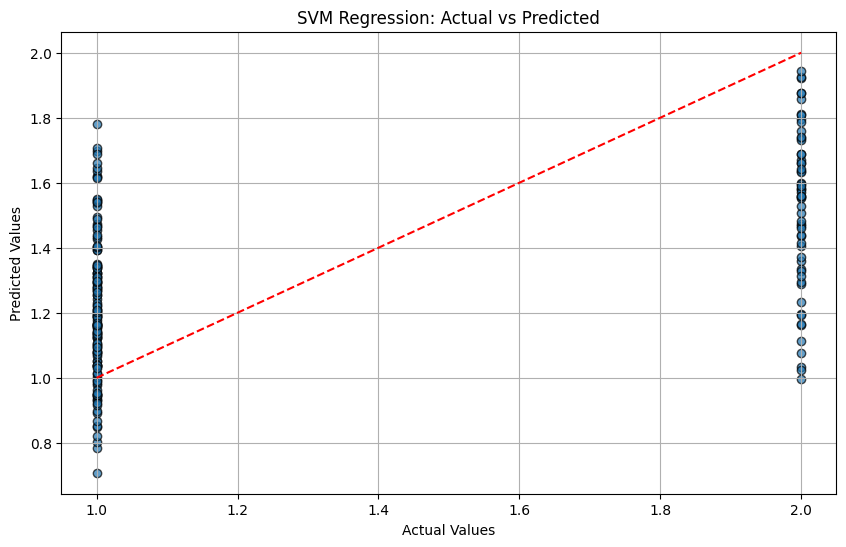

In [24]:
# Plot nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("SVM Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()



Berdasarkan hasil plot dapat disimpulkan bahwa model tidak bekerja optimal karena Banyak prediksi berada jauh dari garis sempurna , dan Model tampaknya tidak dapat membedakan dengan jelas antara dua kelompok nilai aktual (1.0 dan 2.0)

# Visualisasi residu

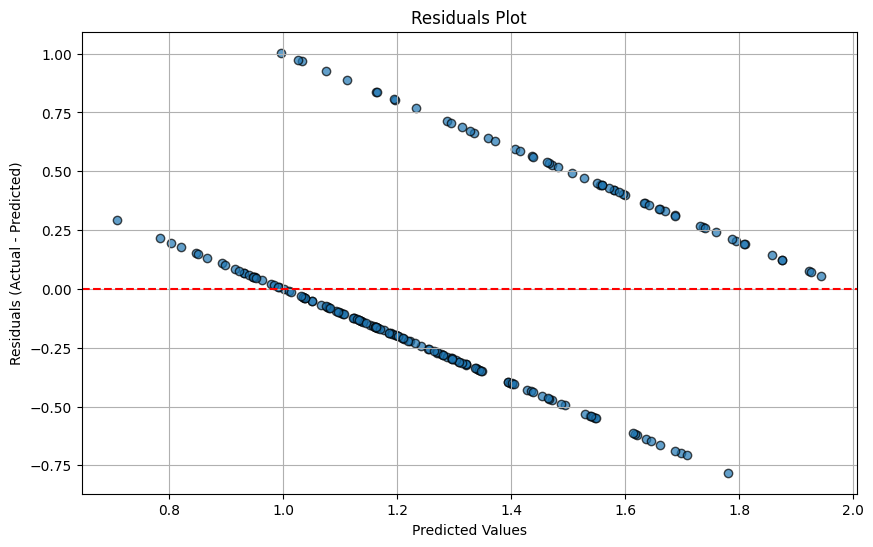

In [25]:
# Visualisasi residu (Error)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


Prediksi lebih rendah dari nilai aktual untuk kelompok target atas (residual positif), dan Prediksi lebih tinggi dari nilai aktual untuk kelompok target bawah (residual negatif).